<a href="https://colab.research.google.com/github/baldeoJV/CCADMACL_Proj_Clustering/blob/main/Coli%20Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
file_path = "NHANES_SES_RawData.csv"  # Update path in Colab
df = pd.read_csv(file_path)


In [ ]:
display(df.head())
display(df.info())

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,OCD150,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      6064 non-null   float64
 1   RIDAGEYR  6064 non-null   float64
 2   RIAGENDR  6064 non-null   float64
 3   DMDEDUC2  6064 non-null   float64
 4   INDFMPIR  6064 non-null   float64
 5   OCD150    6064 non-null   float64
 6   HOD051    6064 non-null   float64
 7   DIQ010    6064 non-null   float64
 8   MCQ010    6064 non-null   float64
 9   MCQ160B   6064 non-null   float64
 10  MCQ160C   6064 non-null   float64
 11  MCQ160E   6064 non-null   float64
 12  MCQ160M   6064 non-null   float64
 13  MCQ160P   6064 non-null   float64
 14  MCQ160L   6064 non-null   float64
 15  MCQ550    6064 non-null   float64
 16  MCQ220    6064 non-null   float64
 17  HSQ590    6064 non-null   float64
 18  LBXHA     6064 non-null   float64
 19  HEQ010    6064 non-null   float64
 20  KIQ022    6064 non-null   floa

None

In [ ]:
print(df.columns)


Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'OCD150',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')


In [ ]:
# Drop Unnecessary Columns (SEQN is just an identifier)
df.drop(columns=['SEQN'], inplace=True)

In [ ]:
# Handle Missing Values (Drop Rows with Missing Values)
df.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
numeric_cols = ['RIDAGEYR', 'INDFMPIR', 'LBXHA']  # Selecting key numerical features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
# Encode Categorical Variables (One-Hot Encoding for Occupation, Housing, etc.)
categorical_cols = ['RIAGENDR', 'DMDEDUC2', 'DIQ010', 'OCD150', 'HOD051']
df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.drop(columns=['Cluster']))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]


In [ ]:
df.to_csv("NHANES_Cleaned_Clustered.csv", index=False)


Cluster Characteristics:
          RIDAGEYR  INDFMPIR     LBXHA
Cluster                              
0        0.046186  1.120276  0.157472
1        0.830938 -0.551331  0.025447
2       -1.009212 -0.589800 -0.201676


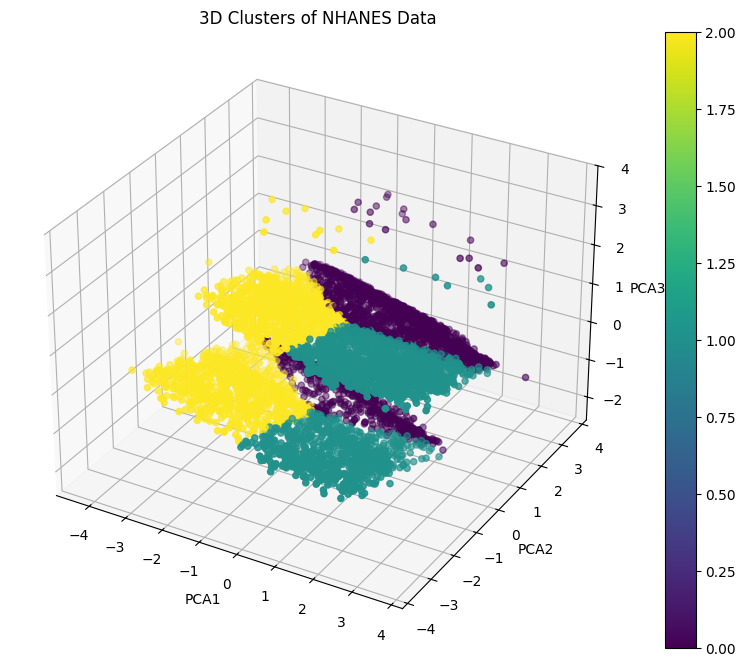

In [ ]:
cluster_summary = df.groupby('Cluster')[['RIDAGEYR', 'INDFMPIR', 'LBXHA']].mean()
print("Cluster Characteristics:\n", cluster_summary)

# Visualize Clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D Clusters of NHANES Data")
plt.colorbar(sc)
plt.show()

In [ ]:
# Display Cluster Summary and Data Preview
print(df.groupby('Cluster').mean())
df.head()



         RIDAGEYR  INDFMPIR    MCQ010   MCQ160B   MCQ160C   MCQ160E   MCQ160M  \
Cluster                                                                         
0        0.046186  1.120276  1.848752  1.981400  1.967695  1.987763  1.861478   
1        0.830938 -0.551331  1.831012  1.933612  1.951718  1.926184  1.815692   
2       -1.009212 -0.589800  1.791109  1.992501  2.008570  1.992501  1.959829   

          MCQ160P   MCQ160L    MCQ550  ...  HOD051_8.0  HOD051_9.0  \
Cluster                                ...                           
0        1.973568  1.963779  1.930984  ...    0.148311    0.070485   
1        1.863045  1.919220  1.842154  ...    0.054782    0.025534   
2        1.983931  1.978040  1.950723  ...    0.036422    0.015533   

         HOD051_10.0  HOD051_11.0  HOD051_12.0  HOD051_77.0  HOD051_99.0  \
Cluster                                                                    
0           0.037200     0.015174     0.018600     0.000489     0.000489   
1           0.0

,RIDAGEYR,INDFMPIR,MCQ010,MCQ160B,MCQ160C,MCQ160E,MCQ160M,MCQ160P,MCQ160L,MCQ550,...,HOD051_9.0,HOD051_10.0,HOD051_11.0,HOD051_12.0,HOD051_77.0,HOD051_99.0,Cluster,PCA1,PCA2,PCA3
0,-0.631484,1.356084,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,False,True,False,False,False,False,0,-1.455788,1.694344,-1.552215
1,0.707133,1.356084,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,True,False,False,False,False,False,0,0.909500,2.586112,-0.065193
2,-0.573283,-0.969894,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,False,False,False,False,False,False,2,-1.220091,-1.868252,-0.556512
3,-1.155290,-1.021727,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,2,-1.895506,-0.666724,1.427570
4,0.823535,-1.028206,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,1,1.795389,-0.867828,0.667857
